<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/401_pandas_2023_%EA%B0%80%EA%B5%AC%ED%8A%B9%EC%84%B1%EB%B3%84_%EC%9E%90%EC%82%B0%EA%B3%BC%EB%B6%80%EC%B1%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 기본설정

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (43.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120899 files and direc

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ai_chat_python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ai_chat_python


In [2]:
import numpy as np
import pandas as pd
# 그래프라이브러리
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])
plt.rc('font', family='NanumBarunGothic')

### 데이터 정리하기.

데이터 참조 사이트
- https://kosis.kr/index/index.do

In [4]:
# 참조할 데이터를 가져오기.
df_kosis = pd.read_csv('./source/가구특성별_자산·부채_20231208175334.csv', encoding='cp949')
df_kosis.head()

,가구특성별,"자산, 부채별",2023
0,가구특성별,"자산, 부채별",전가구 평균 (만원)
1,전체,자산,52727
2,전체,부채,9186
3,(가구주 성) 남자,자산,60582
4,(가구주 성) 남자,부채,10515


In [5]:
df_kosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   가구특성별    83 non-null     object
 1   자산, 부채별  83 non-null     object
 2   2023     83 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [6]:
df_kosis.shape

(83, 3)

In [7]:
df = df_kosis[df_kosis['가구특성별'] != '가구특성별']

In [8]:
df

,가구특성별,"자산, 부채별",2023
1,전체,자산,52727
2,전체,부채,9186
3,(가구주 성) 남자,자산,60582
4,(가구주 성) 남자,부채,10515
5,(가구주 성) 여자,자산,30338
...,...,...,...
78,(가구유형) 다문화가구,부채,7238
79,(가구유형) 장애인가구_조사,자산,36179
80,(가구유형) 장애인가구_조사,부채,5012
81,(가구유형) 장애인가구_행정,자산,43766


In [9]:
df.shape

(82, 3)

In [10]:
df['가구특성별'].unique()

array(['전체', '(가구주 성) 남자', '(가구주 성) 여자', '(가구주 연령) 39세 이하',
       '(가구주 연령) 29세 이하', '(가구주 연령) 30-39세', '(가구주 연령) 40-49세',
       '(가구주 연령) 50-59세', '(가구주 연령) 60세 이상', '(가구주 연령) 65세 이상',
       '(가구주 혼인상태) 미혼', '(가구주 혼인상태) 배우자 있음', '(가구주 혼인상태) 사별',
       '(가구주 혼인상태) 이혼', '(가구주 교육수준) 초졸 이하', '(가구주 교육수준) 중졸',
       '(가구주 교육수준) 고졸', '(가구주 교육수준) 대졸 이상', '(가구주 종사상지위) 상용근로자',
       '(가구주 종사상지위) 임시·일용근로자', '(가구주 종사상지위) 자영업자',
       '(가구주 종사상지위) 기타(무직,학생 등)', '(가구원수) 1인', '(가구원수) 2인', '(가구원수) 3인',
       '(가구원수) 4인', '(가구원수) 5인 이상', '(취업자수) 0인', '(취업자수) 1인', '(취업자수) 2인',
       '(취업자수) 3인 이상', '(순자산) 1분위', '(순자산) 2분위', '(순자산) 3분위', '(순자산) 4분위',
       '(순자산) 5분위', '(가구유형) 한부모가구', '(가구유형) 노인가구', '(가구유형) 다문화가구',
       '(가구유형) 장애인가구_조사', '(가구유형) 장애인가구_행정'], dtype=object)

In [11]:
df.sample(5)

,가구특성별,"자산, 부채별",2023
12,(가구주 연령) 30-39세,부채,11317
61,(취업자수) 3인 이상,자산,81270
44,"(가구주 종사상지위) 기타(무직,학생 등)",부채,4714
60,(취업자수) 2인,부채,13098
77,(가구유형) 다문화가구,자산,41883


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 1 to 82
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   가구특성별    82 non-null     object
 1   자산, 부채별  82 non-null     object
 2   2023     82 non-null     object
dtypes: object(3)
memory usage: 2.6+ KB


In [18]:
df['2023'] = df['2023'].astype(int)

<ipython-input-18-69e8700d65f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2023'] = df['2023'].astype(int)


In [19]:
df['2023'].describe()

count        82.000000
mean      27931.243902
std       26959.247945
min        2201.000000
25%        7263.500000
50%       15536.500000
75%       42818.750000
max      156085.000000
Name: 2023, dtype: float64

In [62]:
df.rename(columns={'2023':'전가구 평균 (만원)'}, inplace=True)

<ipython-input-62-6c10c888de8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'2023':'전가구 평균 (만원)'}, inplace=True)


### 자산과 부채 그래프 따로 만들기.

In [63]:
df_Liabilities = df[(df['자산, 부채별']=='부채')]

In [64]:
df_Liabilities.rename(columns={'자산, 부채별':'부채'}, inplace=True)

<ipython-input-64-282fbed9bacb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Liabilities.rename(columns={'자산, 부채별':'부채'}, inplace=True)


In [65]:
df_Liabilities.tail(5)

,가구특성별,부채,전가구 평균 (만원)
74,(가구유형) 한부모가구,부채,7659
76,(가구유형) 노인가구,부채,3914
78,(가구유형) 다문화가구,부채,7238
80,(가구유형) 장애인가구_조사,부채,5012
82,(가구유형) 장애인가구_행정,부채,5809


In [66]:
df_Asset = df[(df['자산, 부채별']=='자산')]

In [67]:
df_Asset.rename(columns={'자산, 부채별':'자산'}, inplace=True)

<ipython-input-67-7b0a733c0538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Asset.rename(columns={'자산, 부채별':'자산'}, inplace=True)


In [68]:
df_Asset.tail(5)

,가구특성별,자산,전가구 평균 (만원)
73,(가구유형) 한부모가구,자산,34646
75,(가구유형) 노인가구,자산,42680
77,(가구유형) 다문화가구,자산,41883
79,(가구유형) 장애인가구_조사,자산,36179
81,(가구유형) 장애인가구_행정,자산,43766


<Axes: xlabel='가구특성별'>

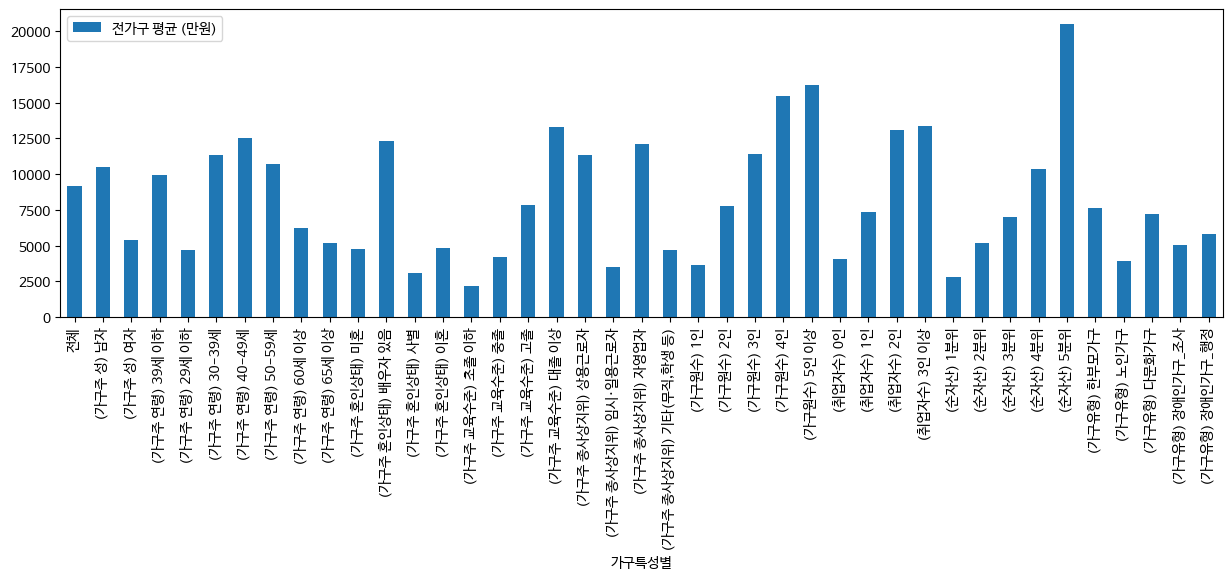

In [69]:
df_Liabilities.set_index(['가구특성별']).plot.bar(figsize=(15,4))

<Axes: xlabel='가구특성별'>

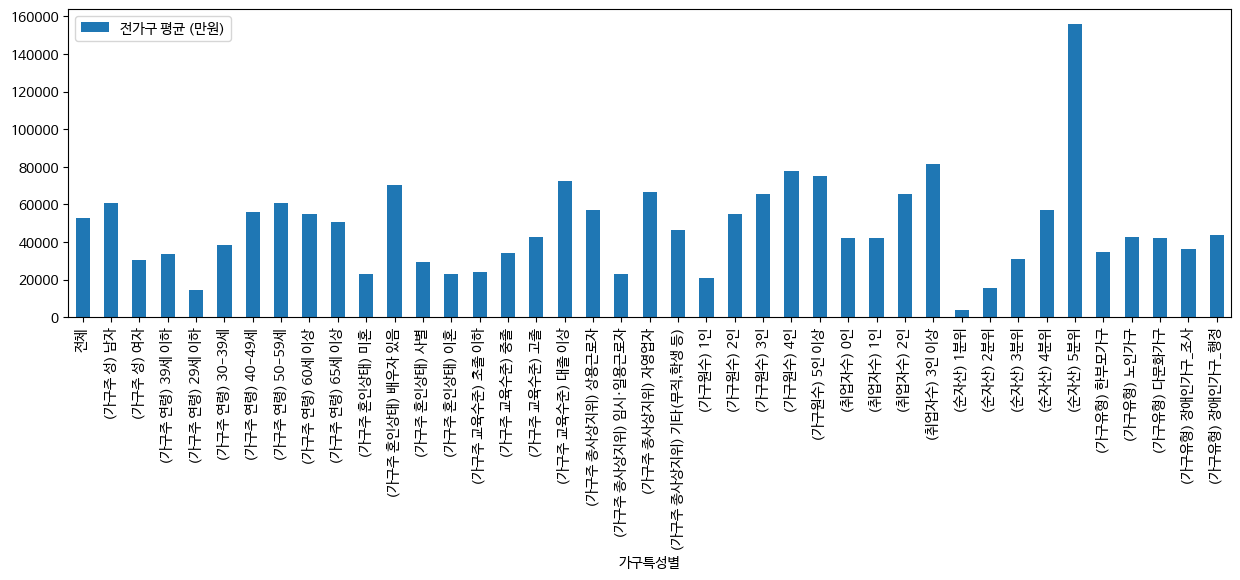

In [70]:
df_Asset.set_index(['가구특성별']).plot.bar(figsize=(15,4))

### 자산 및 부채 비교 그래프 만들기.

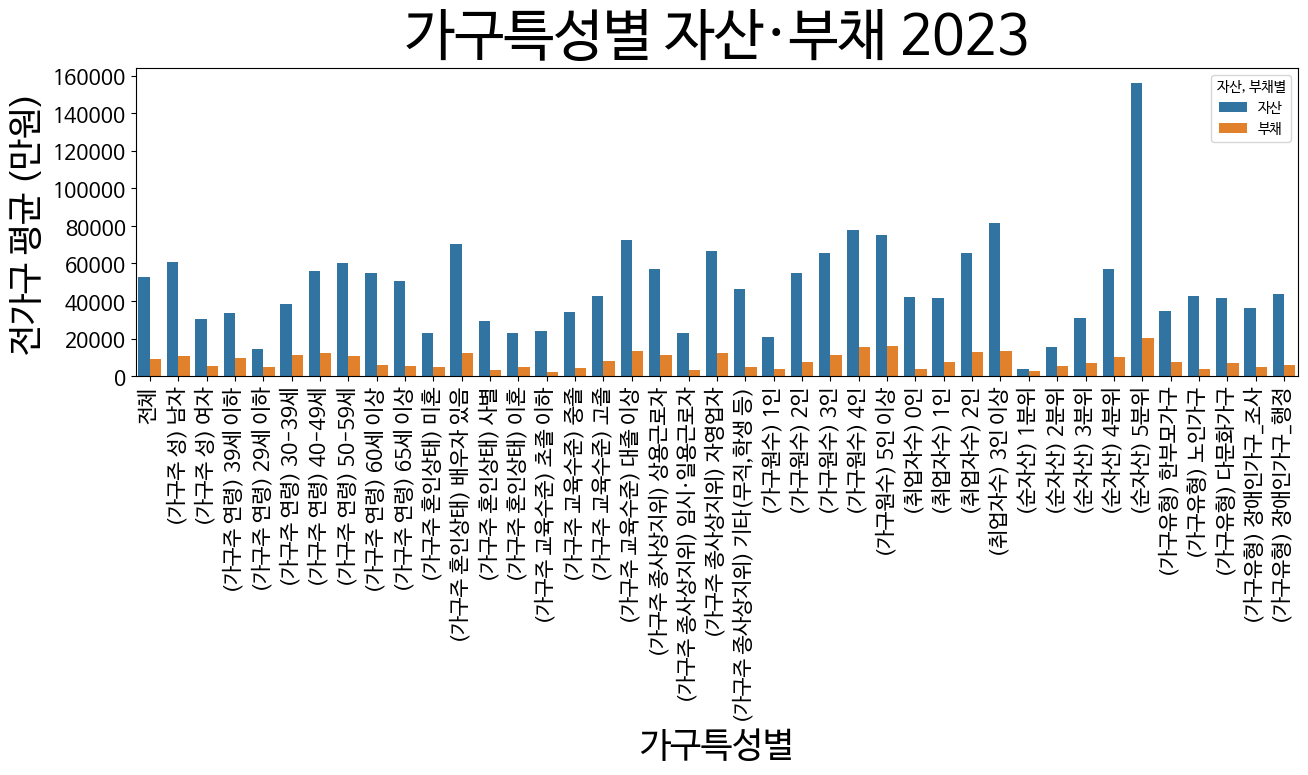

In [77]:
plt.figure(figsize=(15,4))
plt.title('가구특성별 자산·부채 2023', fontsize=40)
plt.xlabel('가구특성별', fontsize=25) # 라벨 사이즈 변경
plt.ylabel('전가구 평균 (만원)', fontsize=25) # 라벨 사이즈 변경
plt.xticks(rotation=90, fontsize=15) # x 눈금값 회전, 폰트 사이즈 변경
plt.yticks(fontsize=15) # y 눈금값 변경
sns.barplot(x='가구특성별', y='전가구 평균 (만원)', errorbar=None, hue='자산, 부채별',data=df)
plt.show()